## Loading Data

Load training data "mnist_train.csv" https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?select=mnist_train.csv 
and testing data "mnist_test.csv" https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?select=mnist_test.csv. Separate the data into training and testing using indexing like we have done in the past. 

In [ ]:
import pandas as pd
import numpy as np

# Add your code to this
data_train = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')

# X train and y train 
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,0]

# X test and y test 
X_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]

## Fitting and Evaluating Your Model
1. Use sklearn.linear_model.RidgeClassifier as your classification model and use sklearn.model_selection.cross_val_score (you can use 5-fold cross validation) as your cross validation tool to evaluate your classifier. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
2. Try different hyperparameters, i.e., alpha, to get the RidgeClassifier with the best cross validation accuracy. (Iterate through a list of different alphas like you did in Lab 7.) Then test this model on (X_test, y_test) and get testing accuracy by using clf_best.score(X_test, y_test) assuming your selected model is named as "clf_best".

*Note: This may take a very long time to run (15-20 min). This is normal. As long as it eventually finishes running and you get output this is okay.*

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score

# Save the best five-fold cross-validation accuracy score
best_scores = 0

# Iterate through alphas like in Lab 7 
for alpha in [0,1e2,1e4,1e6,1e8,1e10]:
  # Create a classifier using Ridge regression
  clf =RidgeClassifier(alpha = alpha)
  # Cross_val_score is used as a simple cross validation technique to prevent 
  # over-fitting and promote model generalization
  # This returns an array of scores of the estimator for each run of the cross-validation
  # 5 fold means you do 80%/20% 5 times for each alpha 
  scores = cross_val_score(clf, X_train, y_train, cv=5)
  # Print the scores
  print(f"cross val score for alpha {alpha}: {scores}")
  # Get the mean for the 5-fold score and print it 
  curr_mean_score = np.mean(scores)
  print("Mean :",curr_mean_score)
  # Save the best 5-fold cross-validation accuracy score and model using simple if statement 
  if best_scores < curr_mean_score:
    best_scores = curr_mean_score
    clf_best = clf
    
# Print the best five-fold cross-validation accuracy score
clf_best.fit(X_train, y_train)
print(f"Best five-fold cross-validation accuracy score: {best_scores}")
# Return the mean accuracy on the given TEST data and labels using the score function
print(f"Test accuracy: {clf_best.score(X_test,y_test)}")

cross val score for alpha 0: [0.85191667 0.82041667 0.83658333 0.839      0.85958333]
Mean : 0.8415000000000001
cross val score for alpha 100.0: [0.85508333 0.84191667 0.84133333 0.8435     0.86291667]
Mean : 0.8489500000000001
cross val score for alpha 10000.0: [0.85616667 0.84333333 0.84141667 0.84425    0.86333333]
Mean : 0.8497
cross val score for alpha 1000000.0: [0.856      0.84558333 0.84183333 0.84483333 0.86341667]
Mean : 0.8503333333333334
cross val score for alpha 100000000.0: [0.86091667 0.84566667 0.84475    0.8505     0.8695    ]
Mean : 0.8542666666666667
cross val score for alpha 10000000000.0: [0.77508333 0.76491667 0.76825    0.77216667 0.79316667]
Mean : 0.7747166666666667
Best five-fold cross-validation accuracy score: 0.8542666666666667
Test accuracy: 0.864


## Exploring More About Neural Networks
As shown by the results in the previous code, we have achieved more than 80% testing accuracy by using RidgeClassifier. However, in the era of deep learning, this is not enough at all. Let's try using a neural network now!

1. Look through https://scikit-learn.org/stable/modules/neural_networks_supervised.html and use sklearn.neural_network.MLPClassifier to train a neural network model for MNIST dataset. For this model selection, you can just split into 80%/20% rather than using cross validation considering the computational time.
2. In MLPClassifier, there are two main hyperparameters you can play with, i.e., hidden_layer_sizes and alpha. As for hidden_layer_sizes, you need to give at least one tuple of several numbers, such as (100,100) representing two hidden layers each with 100 neurons. Create an array with about 3 different hidden layer sizes/tuples.

More information on hidden layers: 
Given input num = 2 and output num = 2, this is hidden layer = (10). 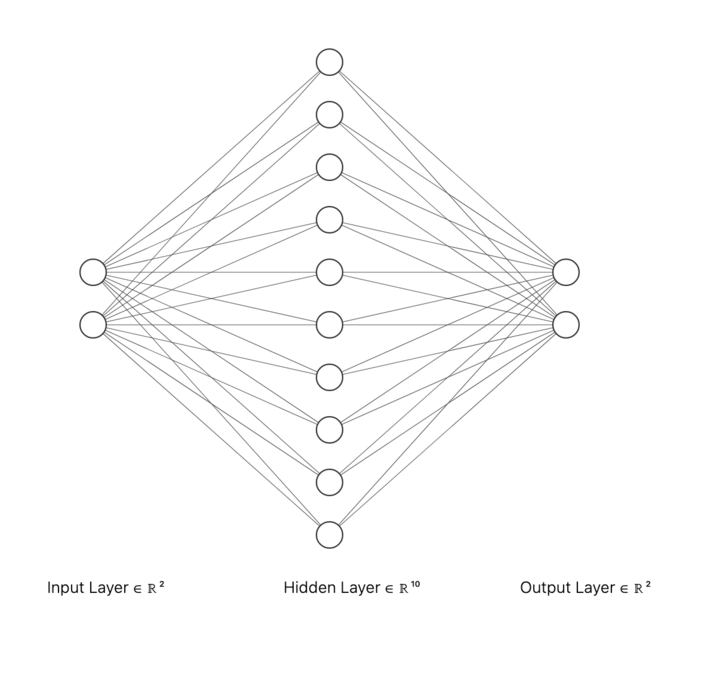


On the other hand, given input = 2 and output = 2, this is hidden layer set equal to (2,2).
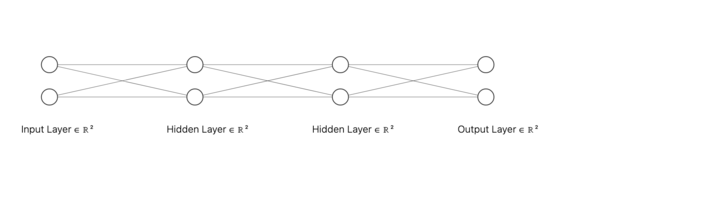
3. Try your best to get MNIST testing accuracy better than 97%.

*Note: This may take a very long time to run (15-20 min). This is normal. As long as it eventually finishes running and you get output this is okay.*


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Save the best validation accuracy score
best_score = 0
# Split the data into training and validation data 
X_Train, X_Val, y_Train, y_Val = train_test_split(X_train, y_train, test_size = 0.2)

# Iterate through list of hidden_layers you create
for hidden_layer in [100,(100,100),(100,100,100)]:
  # Iterate through list of alphas
  for alpha in [0,0.01,0.1]:
    # Create Multi-layer Perceptron classifier
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer, alpha=alpha)
    # Fit the model to data matrix X_train and target(s) y_train
    clf.fit(X_Train, y_Train)
    # Return the mean accuracy on the given test data and labels
    score = clf.score(X_Val, y_Val)
    # Save the current mean
    curr_score = np.mean(score)
    # Print the hidden layer, alpha, and curr_score
    print(f"in the setting hidden layer {hidden_layer}, alpha {alpha}, score: {score}")
    # Save the best validation accuracy score and model using simple if statement 
    if best_score < curr_score:
      best_score = curr_score
      clf_best = clf

# Print the best validation accuracy score
print(f"best 5-fold cross-validation accuracy is {best_score}")
# Return the mean accuracy on the given TEST data and labels using the score function like you did before
print(clf_best.score(X_test,y_test))

in the setting hidden layer 100, alpha 0, score: 0.9635
in the setting hidden layer 100, alpha 0.01, score: 0.9573333333333334
in the setting hidden layer 100, alpha 0.1, score: 0.962
in the setting hidden layer (100, 100), alpha 0, score: 0.96725
in the setting hidden layer (100, 100), alpha 0.01, score: 0.9626666666666667
in the setting hidden layer (100, 100), alpha 0.1, score: 0.9645
in the setting hidden layer (100, 100, 100), alpha 0, score: 0.9686666666666667
in the setting hidden layer (100, 100, 100), alpha 0.01, score: 0.9678333333333333
in the setting hidden layer (100, 100, 100), alpha 0.1, score: 0.97325
best 5-fold cross-validation accuracy is 0.97325
0.9753


## Confusion Matrix and Classification Report
1. Read https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html to understand how to use a confusion matrix. Based on your best model by the above procedure, can you plot the confusion matrix accordingly? (Hint: use clf.predict(X_test) to get the prediction labels over X_test.)

2. Read https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report to understand how to use classification report. Based on your best model by the above procedure, can you ouput the classification report accordingly? 

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
# Add your code here
y_pred = clf.predict(X_test)
print(confusion_matrix(y_true = y_test, y_pred = y_pred))
print(classification_report(y_test, y_pred))

[[ 969    1    1    1    1    0    4    1    2    0]
 [   0 1121    2    0    0    2    7    1    2    0]
 [   3    3 1000    6    2    1    5    7    5    0]
 [   0    0    2  981    0   13    0    9    4    1]
 [   1    1    3    0  964    0    5    1    2    5]
 [   1    0    0    5    0  873    6    1    3    3]
 [   2    2    1    0    6    4  941    0    2    0]
 [   0    5   12    3    1    0    1  996    4    6]
 [   3    2    4    5    1    4    5    2  945    3]
 [   1    4    0    2   18   12    1    4    4  963]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97   